In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###


# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns', None)
import pickle

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

In [12]:
### YOUR CODE HERE ###
#Tree based models are ribust for outliers, hence t outliers do not need to be removed.


In [13]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].str.len()

In [15]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data[['claim_status', 'text_length']].groupby(['claim_status']).mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


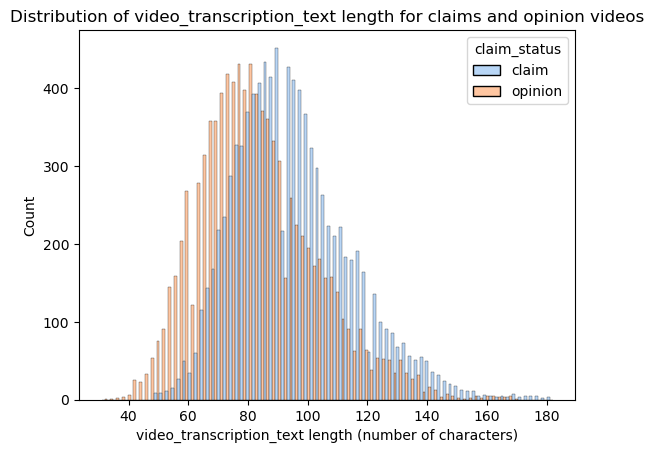

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data, stat="count", multiple="dodge", x="text_length", kde=False, palette="pastel",
             hue="claim_status", element="bars", legend=True) 
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinion videos") 
plt.show()


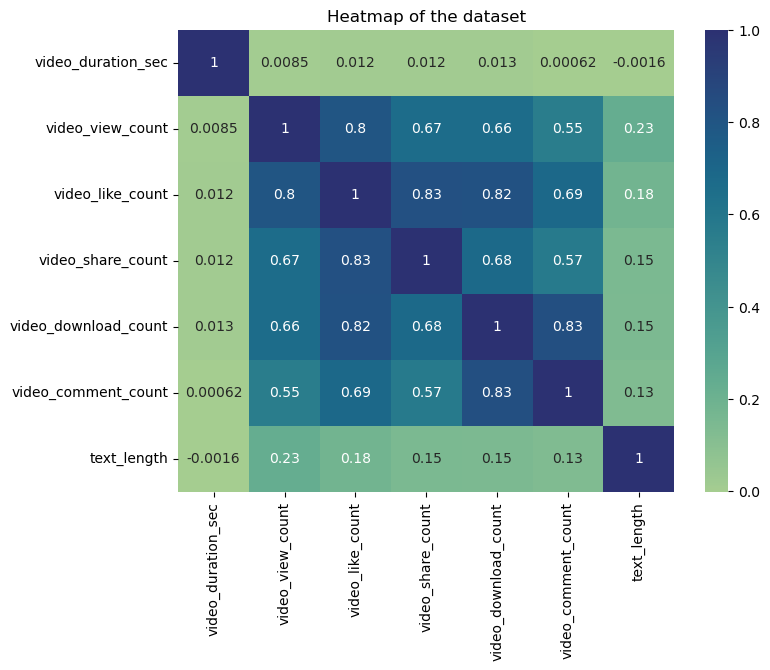

In [17]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.heatmap(data[["video_duration_sec", "verified_status", "author_ban_status", "video_view_count",
                  "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [18]:
# Select outcome variable 
### YOUR CODE HERE ###
X = data.copy
X = data.drop(['claim_status', '#', 'video_id'], axis=1)

In [19]:
### YOUR CODE HERE ###
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)
# Display first few rows
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [20]:
### YOUR CODE HERE ###
y = data['claim_status'].replace({'opinion': 0, 'claim': 1})


In [21]:
#Isolate features
### YOUR CODE HERE ###
X = X.drop(['video_transcription_text'], axis=1)
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [22]:
### YOUR CODE HERE ###
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [23]:
### YOUR CODE HERE ###
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0)

In [24]:

### YOUR CODE HERE ###
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((12213, 10), (3817, 10), (3054, 10), (12213,), (3817,), (3054,))

In [25]:
%%time
# Instantiate the random forest classifier
### YOUR CODE HERE ###by
rf =RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'n_estimators': [50, 100, 200],
             'max_depth': [3,6, 8, None],
             'min_samples_split': [2, 3],
             'min_samples_leaf': [2, 3],
             'max_features': [2, 3, 4]
             
            }

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')
##rf_cv.fit(X_train, y_train)


CPU times: user 40 µs, sys: 11 µs, total: 51 µs
Wall time: 54.4 µs


In [26]:
path = '/home/jovyan/work/'
##with open(path + 'rf_cv_model.pickle', 'wb') as to_write:
##  pickle.dump(rf_cv, to_write)
    

with open(path+'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

    
rf_cv.best_score_

0.9904496678589678

In [27]:
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [28]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = table._append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall, 
                          'Precision': precision, 
                          'Accuracy': accuracy 
                         },
                         ignore_index=True
                        )
                          
    return table

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###by
rf_cv_results = make_results("Tuned RandomForest CV", rf_cv)

rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Tuned RandomForest CV,0.994957,0.99045,0.99951,0.994923


In [29]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Tuned RandomForest CV,0.994957,0.99045,0.99951,0.994923


### **Build an XGBoost model**

In [30]:
%%time
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_xgb_params = {'n_estimators': [50, 100, 200],
             'max_depth': [3, 6, 8],
             'min_child_weight': [1, 2, 3, 4, 5],
             'learning_rate': [0.1, 0.2, 0.3]
                }
# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring_xgb = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_xgb_params, scoring=scoring_xgb, cv=5, refit='recall')
##xgb_cv.fit(X_train, y_train)


CPU times: user 41 µs, sys: 12 µs, total: 53 µs
Wall time: 56 µs


In [31]:
path = '/home/jovyan/work/'
##with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
##  pickle.dump(xgb_cv, to_write)
    

with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

    
xgb_cv.best_score_

0.9906114801567025

In [32]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
xgb_cv_results = make_results('XGBoost CV', xgb_cv)

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
results = pd.concat([xgb_cv_results, rf_cv_results]).sort_values(by=['Recall'], ascending=False)
results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.994877,0.990611,0.999185,0.994841
0,Tuned RandomForest CV,0.994957,0.990450,0.999510,0.994923


In [33]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 200}

In [34]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
##rf_opt = RandomForestClassifier(max_depth= 8, max_features = 4, min_samples_leaf= 2, min_samples_split=2, n_estimators=50,
##                               random_state=0)
##rf_opt.fit(X_train, y_train)
y_pred = rf_cv.best_estimator_.predict(X_val)

In [35]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred 
pd.DataFrame(y_pred)

,0
0,1
1,0
2,1
3,1
4,1
...,...
3049,0
3050,1
3051,0
3052,1


In [36]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
pd.DataFrame(y_val)

,claim_status
5846,1
12058,0
2975,1
8432,1
6863,1
...,...
10274,0
3980,1
11695,0
6007,1


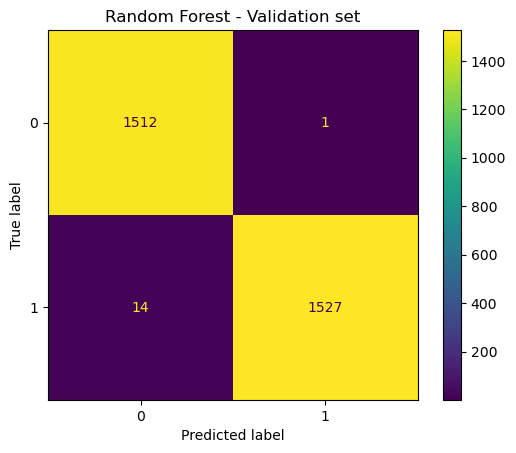

In [37]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, y_pred, labels= rf_cv.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
### YOUR CODE HERE ###
plt.title('Random Forest - Validation set')
plt.show()

In [38]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1513
       claim       1.00      0.99      1.00      1541

    accuracy                           1.00      3054
   macro avg       1.00      1.00      1.00      3054
weighted avg       1.00      1.00      1.00      3054



#### **XGBoost**

In [39]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

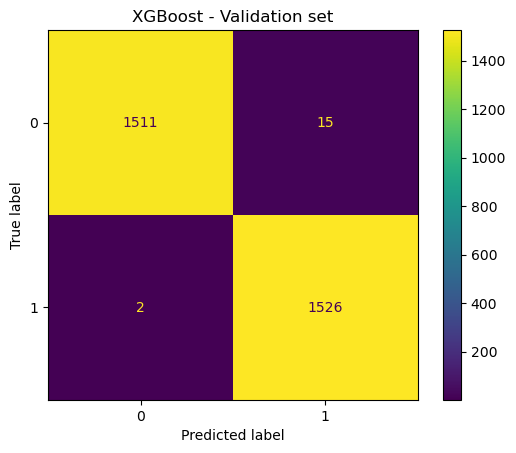

In [40]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_pred_xgb, y_val, labels=xgb_cv.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
### YOUR CODE HERE ###
plt.title('XGBoost - Validation set')
plt.show()

In [41]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1513
       claim       1.00      0.99      0.99      1541

    accuracy                           0.99      3054
   macro avg       0.99      0.99      0.99      3054
weighted avg       0.99      0.99      0.99      3054



In [42]:
### YOUR CODE HERE ###
y_pred_test = rf_cv.best_estimator_.predict(X_test)

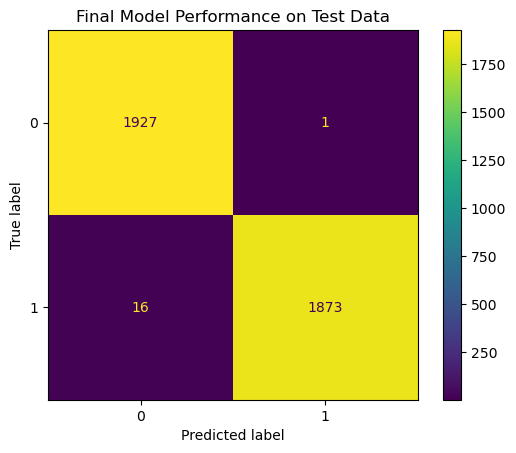

In [43]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred_test)
# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
### YOUR CODE HERE ###
plt.title('Final Model Performance on Test Data')
plt.show()

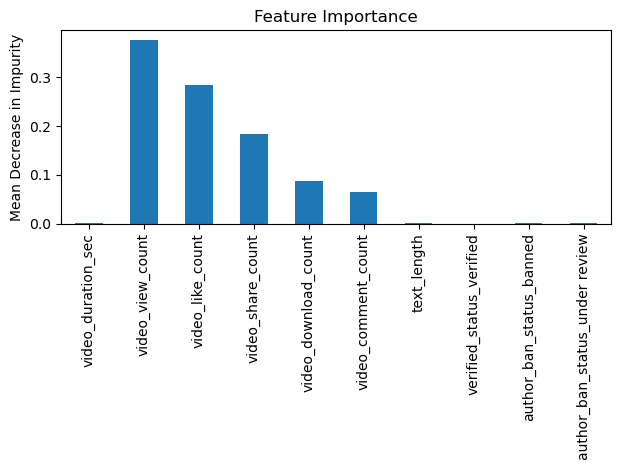

In [44]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importance')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()